**Breast Cancer Prediction**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
breast =pd.read_csv("/content/breast-cancer.csv")
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [6]:
breast.shape

(569, 32)

In [7]:
breast['diagnosis'].value_counts()
breast.shape

(569, 32)

In [8]:
# Ensure column is string, strip spaces, and convert to uppercase
breast['diagnosis'] = breast['diagnosis'].astype(str).str.strip().str.upper()

# Now map to numeric
breast['diagnosis'] = breast['diagnosis'].map({'M': 1, 'B': 0})

# Check result
print(breast['diagnosis'].value_counts(dropna=False))


diagnosis
0    357
1    212
Name: count, dtype: int64


In [10]:
print(repr(breast['diagnosis'].unique()))


array([1, 0])


In [12]:
# 4. Split features (X) and target (y)
X = breast.drop(columns=['diagnosis'])
y = breast['diagnosis']

In [14]:
X.shape


(569, 31)

In [15]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
# 6. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# 7. Train Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [18]:
# 8. Predictions
y_pred = model.predict(X_test)

In [19]:
# 9. Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



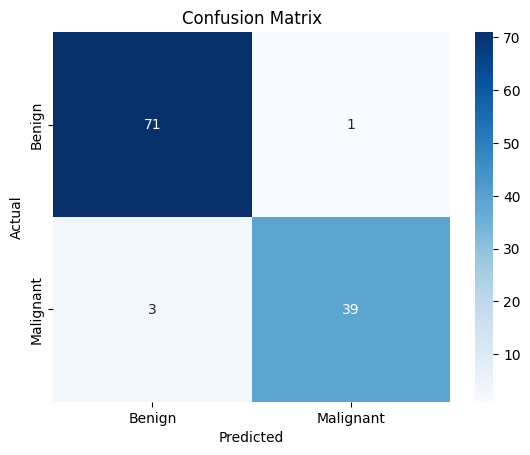

In [20]:
# 10. Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# ==============================
# Train Multiple Models
# ==============================

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)  # linear kernel often works well here
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n===== {name} =====")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))



===== Logistic Regression =====
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


===== Random Forest =====
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114


===== SVM =====
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
  

In [23]:
# ==============================
# Compare Results
# ==============================
print("\n✅ Model Comparison (Accuracy):")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


✅ Model Comparison (Accuracy):
Logistic Regression: 0.9649
Random Forest: 0.9561
SVM: 0.9649
